# Dimensionality Reduction in Python
#### Course Description
High-dimensional datasets can be overwhelming and leave you not knowing where to start. Typically, you’d visually explore a new dataset first, but when you have too many dimensions the classical approaches will seem insufficient. Fortunately, there are visualization techniques designed specifically for high dimensional data and you’ll be introduced to these in this course. After exploring the data, you’ll often find that many features hold little information because they don’t show any variance or because they are duplicates of other features. You’ll learn how to detect these features and drop them from the dataset so that you can focus on the informative ones. In a next step, you might want to build a model on these features, and it may turn out that some don’t have any effect on the thing you’re trying to predict. You’ll learn how to detect and drop these irrelevant features too, in order to reduce dimensionality and thus complexity. Finally, you’ll learn how feature extraction techniques can reduce dimensionality for you through the calculation of uncorrelated principal components.

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Exploring high dimensional data

You'll be introduced to the concept of dimensionality reduction and will learn when an why this is important. You'll learn the difference between feature selection and feature extraction and will apply both techniques for data exploration. The chapter ends with a lesson on t-SNE, a powerful feature extraction technique that will allow you to visualize a high-dimensional dataset.

In [2]:
cols = ['HP', 'Attack', 'Defense', 'Generation', 'Name', 'Type 1']
pokemon_df = pd.read_csv('data/pokemon.csv', index_col=0)
pokemon_df = pokemon_df[cols]
pokemon_df.columns = ['HP', 'Attack', 'Defense', 'Generation', 'Name', 'Type']

In [3]:
df_selected = pokemon_df[['HP', 'Attack', 'Defense', 'Name', 'Type']]

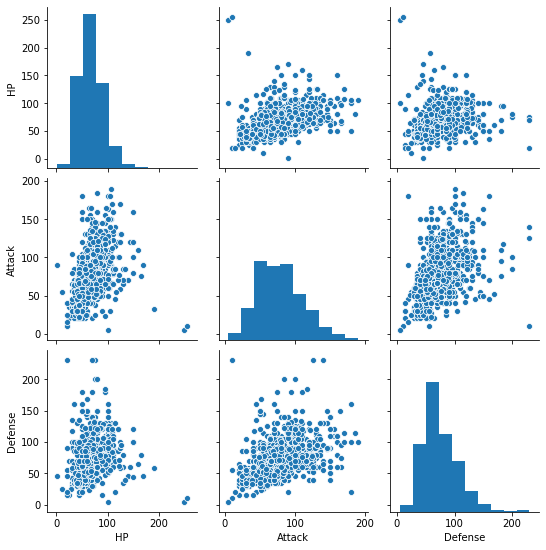

In [4]:
sns.pairplot(df_selected, diag_kind='hist')

### Visually detecting redundant features
Data visualization is a crucial step in any data exploration. Let's use Seaborn to explore some samples of the US Army ANSUR body measurement dataset.

Two data samples have been pre-loaded as ansur_df_1 and ansur_df_2.

Seaborn has been imported as sns.

### Instructions 
- Create a pairplot of the ansur_df_1 data sample and color the points using the 'Gender' feature.


In [5]:
ansur_df_1 = pd.read_csv('data/ANSUR.csv', index_col=0)
ansur_df_2 = pd.read_csv('data/ANSURI.csv', index_col=0)

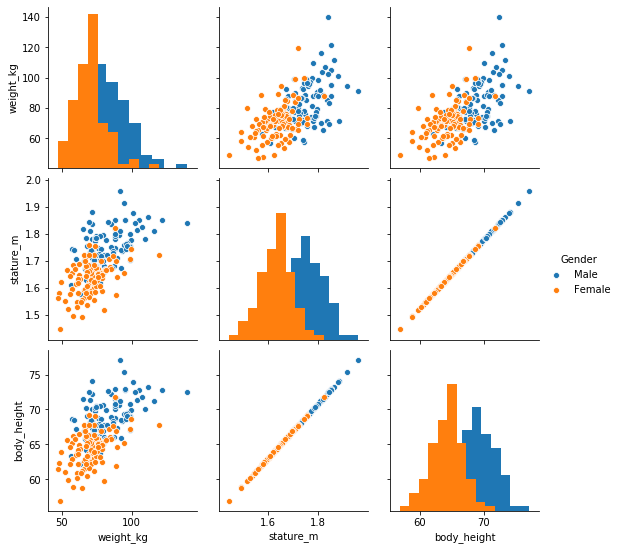

In [6]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_1, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

- Two features are basically duplicates, remove one of them from the dataset.

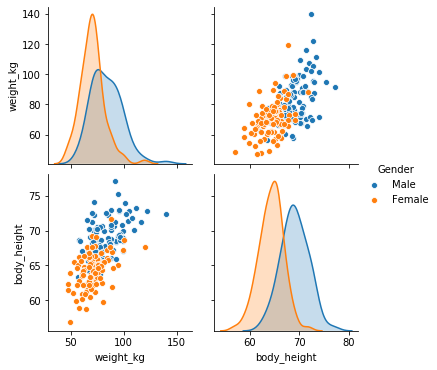

In [7]:
# Remove one of the redundant features
reduced_df = ansur_df_1.drop('stature_m', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender')

# Show the plot
plt.show()

- Now create a pairplot of the ansur_df_2 data sample and color the points using the 'Gender' feature.

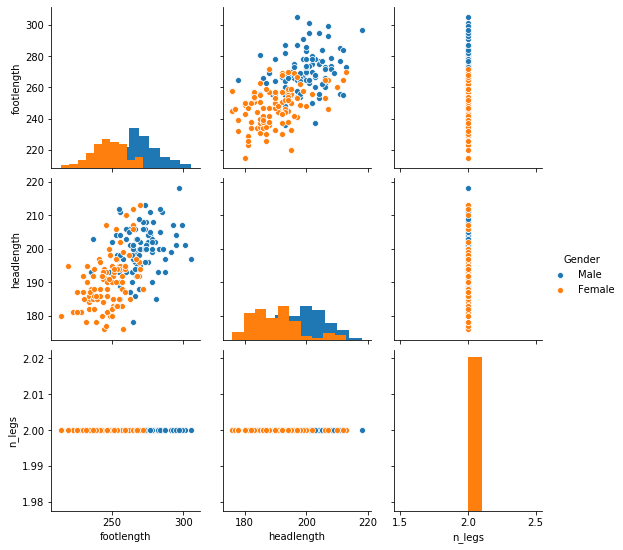

In [8]:
# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(ansur_df_2, hue='Gender', diag_kind='hist')


# Show the plot
plt.show()

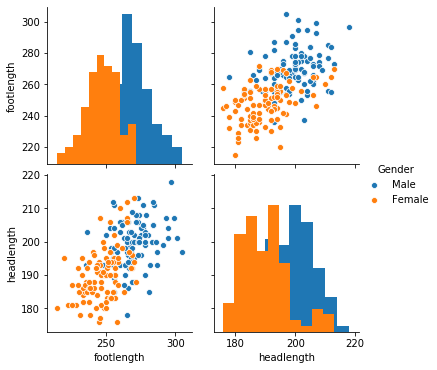

In [9]:
# Remove the redundant feature
reduced_df = ansur_df_2.drop('n_legs', axis = 1)

# Create a pairplot and color the points using the 'Gender' feature
sns.pairplot(reduced_df, hue='Gender', diag_kind='hist')

# Show the plot
plt.show()

In [106]:
### Preparing dataset

cols = ['Branch', 'Component', 'Gender', 'abdominalextensiondepthsitting', 'acromialheight', 'acromionradialelength', 'anklecircumference', 'axillaheight', 'balloffootcircumference',
       'balloffootlength', 'biacromialbreadth', 'bicepscircumferenceflexed', 'bicristalbreadth', 'bideltoidbreadth', 'bimalleolarbreadth', 'bitragionchinarc', 'bitragionsubmandibulararc',
       'bizygomaticbreadth', 'buttockcircumference', 'buttockdepth', 'buttockheight', 'buttockkneelength', 'buttockpopliteallength', 'calfcircumference', 'cervicaleheight', 'chestbreadth',
       'chestcircumference', 'chestdepth', 'chestheight', 'crotchheight', 'crotchlengthomphalion', 'crotchlengthposterioromphalion', 'earbreadth', 'earlength', 'earprotrusion', 'elbowrestheight',
       'eyeheightsitting', 'footbreadthhorizontal', 'footlength', 'forearmcenterofgriplength', 'forearmcircumferenceflexed', 'forearmforearmbreadth', 'forearmhandlength', 'functionalleglength',
       'handbreadth', 'handcircumference', 'handlength', 'headbreadth', 'headcircumference', 'headlength', 'heelanklecircumference', 'heelbreadth', 'hipbreadth', 'hipbreadthsitting',
       'iliocristaleheight', 'interpupillarybreadth', 'interscyei', 'interscyeii', 'kneeheightmidpatella', 'kneeheightsitting', 'lateralfemoralepicondyleheight', 'lateralmalleolusheight',
       'lowerthighcircumference', 'mentonsellionlength', 'neckcircumference', 'neckcircumferencebase', 'overheadfingertipreachsitting', 'palmlength', 'poplitealheight', 'radialestylionlength',
       'shouldercircumference', 'shoulderelbowlength', 'shoulderlength', 'sittingheight', 'sleevelengthspinewrist', 'sleeveoutseam', 'span', 'suprasternaleheight', 'tenthribheight',
       'thighcircumference', 'thighclearance', 'thumbtipreach', 'tibialheight', 'tragiontopofhead', 'trochanterionheight', 'verticaltrunkcircumferenceusa', 'waistbacklength', 'waistbreadth',
       'waistcircumference', 'waistdepth', 'waistfrontlengthsitting', 'waistheightomphalion', 'wristcircumference', 'wristheight']

In [107]:
ansur_male = pd.read_csv('data/ANSUR_II_MALE.csv', index_col=0)
ansur_female = pd.read_csv('data/ANSUR_II_FEMALE.csv', index_col=0)
df = pd.concat([ansur_female,ansur_male], axis = 0)[cols].reset_index()

### Fitting t-SNE to the ANSUR data
t-SNE is a great technique for visual exploration of high dimensional datasets. In this exercise, you'll apply it to the ANSUR dataset. You'll remove non-numeric columns from the pre-loaded dataset df and fit TSNE to his numeric dataset.

#### Instructions

- Drop the non-numeric columns from the dataset.
- Create a TSNE model with learning rate 50.
- Fit and transform the model on the numeric dataset.

In [108]:
# Non-numerical columns in the dataset
non_numeric = ['Branch', 'Gender', 'Component']

# Drop the non-numerical columns from df
df_numeric = df.drop(non_numeric, axis=1)

In [109]:
# Create a t-SNE model with learning rate 50
m = TSNE(learning_rate = 50)

# Fit and transform the t-SNE model on the numeric dataset
tsne_features = m.fit_transform(df_numeric)
print(tsne_features.shape)

(6068, 2)


### t-SNE visualisation of dimensionality
Time to look at the results of your hard work. In this exercise, you will visualize the output of t-SNE dimensionality reduction on the combined male and female Ansur dataset. You'll create 3 scatterplots of the 2 t-SNE features ('x' and 'y') which were added to the dataset df. In each scatterplot you'll color the points according to a different categorical variable.

seaborn has already been imported as sns and matplotlib.pyplot as plt.

#### Instructions 
- Use seaborn's sns.scatterplot to create the plot.
- Color the points by 'Component'.
- Color the points of the scatterplot by 'Branch'.
- Color the points of the scatterplot by 'Gender'.

In [110]:
df_tsne_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       6068 non-null   float32
 1   y       6068 non-null   float32
dtypes: float32(2)
memory usage: 47.5 KB


In [111]:
df_tsne_features = pd.DataFrame({'x':tsne_features[:,0], 'y': tsne_features[:,1]})
df = pd.concat([df, df_tsne_features], axis = 1)

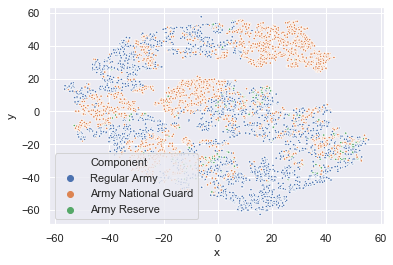

In [112]:
sns.set()
# Color the points according to Army Component
sns.scatterplot(x="x", y="y", data=df, hue= 'Component', s= 6)

# Show the plot
plt.show()

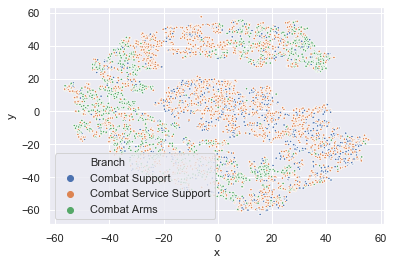

In [113]:
# Color the points by Army Branch
sns.scatterplot(x="x", y="y", hue='Branch', data=df, s= 6)

# Show the plot
plt.show()

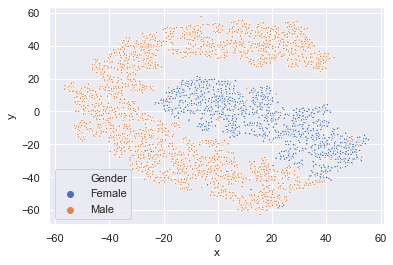

In [114]:
# Color the points by Gender
sns.scatterplot(x="x", y="y", hue='Gender', data=df,  s= 6)

# Show the plot
plt.show()

# 2. Feature selection I, selecting for feature information

In this first out of two chapters on feature selection, you'll learn about the curse of dimensionality and how dimensionality reduction can help you overcome it. You'll be introduced to a number of techniques to detect and remove features that bring little added value to the dataset. Either because they have little variance, too many missing values, or because they are strongly correlated to other features.

In [120]:
ansur_df = pd.read_csv('data/ANSUR_OVERFIT.csv')


### Train - test split
In this chapter, you will keep working with the ANSUR dataset. Before you can build a model on your dataset, you should first decide on which feature you want to predict. In this case, you're trying to predict gender.

You need to extract the column holding this feature from the dataset and then split the data into a training and test set. The training set will be used to train the model and the test set will be used to check its performance on unseen data.

ansur_df has been pre-loaded for you.

#### Instructions

- Import the train_test_split function from sklearn.model_selection.
- Assign the 'Gender' column to y.
- Remove the 'Gender' column from the dataframe and assign the result to X.
- Set the test size to 30% to perform a 70% train and 30% test data split.

In [150]:
# Import train_test_split()
from sklearn.model_selection import train_test_split

# Select the Gender column as the feature to be predicted (y)
y = ansur_df['Gender']

# Remove the Gender column to create the training data
X = ansur_df.drop('Gender', axis = 1)

# Perform a 70% train and 30% test data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print("{} rows in test set vs. {} in training set. {} Features."
      .format(X_test.shape[0], X_train.shape[0], X_test.shape[1]))

300 rows in test set vs. 700 in training set. 91 Features.


### Fitting and testing the model
In the previous exercise, you split the dataset into X_train, X_test, y_train, and y_test. These datasets have been pre-loaded for you. You'll now create a support vector machine classifier model (SVC()) and fit that to the training data. You'll then calculate the accuracy on both the test and training set to detect overfitting.

#### Instructions

- Import SVC from sklearn.svm and accuracy_score from sklearn.metrics
- Create an instance of the Support Vector Classification class (SVC()).
- Fit the model to the training data.
- Calculate accuracy scores on both train and test data.

In [151]:
# Create an instance of the Support Vector Classification class
svc = SVC()

# Fit the model to the training data
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.0% accuracy on test set vs. 94.0% on training set


## the prior fit was supposed to be overfitted but didn't happened

### Accuracy after dimensionality reduction
You'll reduce the overfit with the help of dimensionality reduction. In this case, you'll apply a rather drastic form of dimensionality reduction by only selecting a single column that has some good information to distinguish between genders. You'll repeat the train-test split, model fit and prediction steps to compare the accuracy on test vs. training data.

All relevant packages and y have been pre-loaded.

#### Instructions

- Select just the neck circumference ('neckcircumferencebase') column from ansur_df.
- Split the data, instantiate a classifier and fit the data. This has been done for you.
- Once again calculate the accuracy scores on both training and test set.

In [152]:
# Assign just the 'neckcircumferencebase' column from ansur_df to X
X = ansur_df[['neckcircumferencebase']]

# Split the data, instantiate a classifier and fit the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
svc = SVC()
svc.fit(X_train, y_train)

# Calculate accuracy scores on both train and test data
accuracy_train = accuracy_score(y_train, svc.predict(X_train))
accuracy_test = accuracy_score(y_test, svc.predict(X_test))

print("{0:.1%} accuracy on test set vs. {1:.1%} on training set".format(accuracy_test, accuracy_train))

94.7% accuracy on test set vs. 94.1% on training set


###  Finding a good variance threshold
You'll be working on a slightly modified subsample of the ANSUR dataset with just head measurements pre-loaded as head_df.

#### Instructions
- Create a boxplot on head_df
- Normalize the data by dividing the dataframe with its mean values.

In [162]:
head_df = pd.read_csv('data/ANSUR_HEAD.txt', index_col=0)

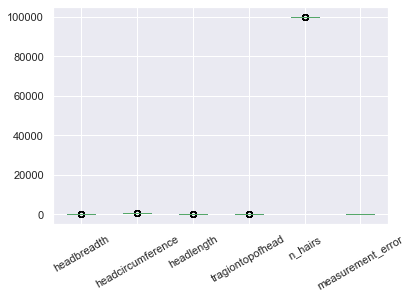

In [166]:
# Create the boxplot
head_df.plot(kind = 'box')
plt.xticks(rotation = 30)

plt.show()

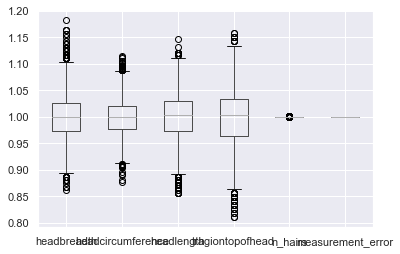

In [167]:
# Normalize the data
normalized_df = head_df / head_df.mean()

normalized_df.boxplot()
plt.show()

In [168]:
# Normalize the data
normalized_df = head_df / head_df.mean()

# Print the variances of the normalized data
print(normalized_df.var())

headbreadth          1.678952e-03
headcircumference    1.029623e-03
headlength           1.867872e-03
tragiontopofhead     2.639840e-03
n_hairs              1.002552e-08
measurement_error    3.231707e-27
dtype: float64


### Features with low variance
In the previous exercise you established that 0.001 is a good threshold to filter out low variance features in head_df after normalization. Now use the VarianceThreshold feature selector to remove these features.

#### Instructions

- Create the variance threshold selector with a threshold of 0.001.
- Normalize the head_df dataframe by dividing it by its mean values and fit the selector.
- Create a boolean mask from the selector using .get_support().
- Create a reduced dataframe by passing the mask to the .loc[] method.

In [169]:
# Create a VarianceThreshold feature selector
sel = VarianceThreshold(threshold=0.001)

# Fit the selector to normalized head_df
sel.fit(head_df / head_df.mean())

# Create a boolean mask
mask = sel.get_support()

# Apply the mask to create a reduced dataframe
reduced_df = head_df.loc[:, mask]

print("Dimensionality reduced from {} to {}."
      .format(head_df.shape[1], reduced_df.shape[1]))

Dimensionality reduced from 6 to 4.


### Removing features with many missing values
You'll apply feature selection on the Boston Public Schools dataset which has been pre-loaded as school_df. Calculate the missing value ratio per feature and then create a mask to remove features with many missing values.

#### Instructions 

- Create a boolean mask on whether each feature has less than 50% missing values.
- Apply the mask to school_df to select columns without many missing values.

In [170]:
school_df = pd.read_csv('data/Public_Schools2.csv')

In [172]:
# Create a boolean mask on whether each feature less than 50% missing values.
mask = school_df.isna().sum() / len(school_df) < 0.5

# Create a reduced dataset by applying the mask
reduced_df = school_df.loc[:,mask]

print(school_df.shape)
print(reduced_df.shape)

(131, 21)
(131, 19)


# 3. Feature selection II, selecting for model accuracy

In this second chapter on feature selection, you'll learn how to let models help you find the most important features in a dataset for predicting a particular target feature. In the final lesson of this chapter, you'll combine the advice of multiple, different, models to decide on which features are worth keeping.

# 4. Feature extraction

This chapter is a deep-dive on the most frequently used dimensionality reduction algorithm, Principal Component Analysis (PCA). You'll build intuition on how and why this algorithm is so powerful and will apply it both for data exploration and data pre-processing in a modeling pipeline. You'll end with a cool image compression use case.